In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print('Размер обучающего набора: {}; размер тестового набора: {}'.format(
    X_train.shape[0], X_test.shape[0]))

best_score = 0

for g in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=g, C=c)
        svm.fit(X_train, y_train)

        score = svm.score(X_test, y_test)

        if score > best_score:
            best_score = score
            best_parameters = {'C': c, 'gamma': g}

Размер обучающего набора: 112; размер тестового набора: 38


In [8]:
print('Наилучшее значение правильности предсказания: {:.2f}'.format(
    best_score))
print('Наилучшие значения параметров: {}'.format(best_parameters))

Наилучшее значение правильности предсказания: 0.97
Наилучшие значения параметров: {'C': 100, 'gamma': 0.001}


In [9]:
import mglearn
import numpy as np
from sklearn.model_selection import cross_val_score

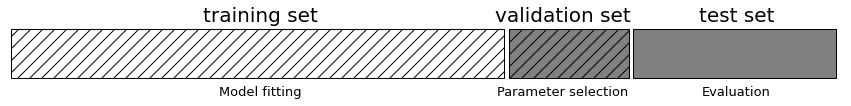

In [10]:
mglearn.plots.plot_threefold_split()

In [11]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)

print('Размер обучающего набора: {}; размер проверочного набора: {}; \
    размер тестового набора: {}'.format(
        X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for g in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=g, C=c)
        svm.fit(X_train, y_train)

        score = svm.score(X_valid, y_valid)

        if score > best_score:
            best_score = score
            best_parameters = {'C': c, 'gamma':g}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)

Размер обучающего набора: 84; размер проверочного набора: 28;     размер тестового набора: 38


In [12]:
print('Лучшее значение правильности на проверочном наборе: {:.2f}'.format(
    best_score))
print('Наилучшие значения параметров: ', best_parameters)
print('Правильность на тестовом наборе с наилучшими параметрами: {:.2f}'.format(
    test_score))

Лучшее значение правильности на проверочном наборе: 0.96
Наилучшие значения параметров:  {'C': 10, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.92


In [13]:
for g in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=g, C=c)

        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)

        score = np.mean(scores)

        if score > best_score:
            best_score = score
            best_parameters = {'C': c, 'gamma': g}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

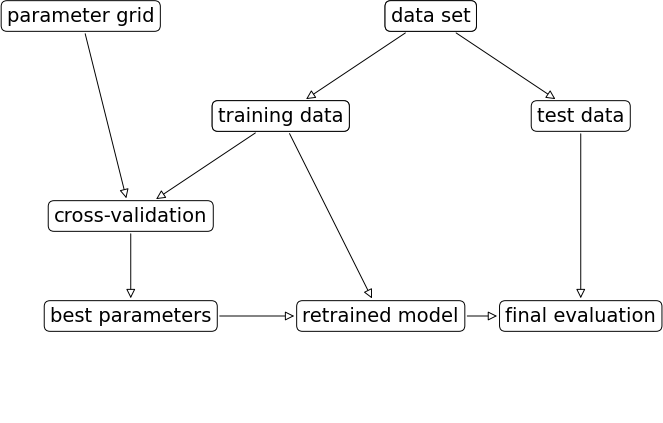

In [14]:
mglearn.plots.plot_grid_search_overview()

In [15]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

print('Сетка параметров:\n{}'.format(param_grid))

Сетка параметров:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [18]:
print('Правильность на тестовом наборе: {:.2f}'.format(
    grid_search.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


In [19]:
print('Наилучшие значения параметров: {}'.format(grid_search.best_params_))
print('Наилучшее значение правильности при кросс-валидации: {}'.format(
    grid_search.best_score_))
print('Наилучшая модель:\n{}'.format(grid_search.best_estimator_))

Наилучшие значения параметров: {'C': 10, 'gamma': 0.1}
Наилучшее значение правильности при кросс-валидации: 0.9731225296442687
Наилучшая модель:
SVC(C=10, gamma=0.1)


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
results = pd.DataFrame(grid_search.cv_results_)

results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001396,4.885396e-04,0.000798,0.000399,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000599,4.890068e-04,0.000598,0.000488,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000997,5.001110e-07,0.000399,0.000489,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000797,3.987079e-04,0.000399,0.000489,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000798,3.990415e-04,0.000598,0.000488,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


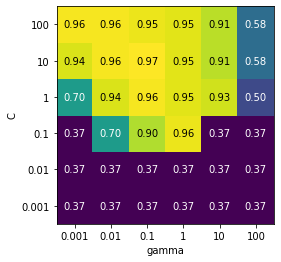

In [22]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
            ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

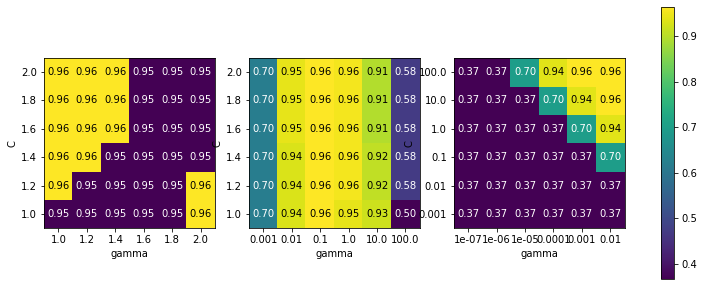

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
    'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
    'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-7, -2, 6)}

for param_gr, ax in zip(
    [param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_gr, cv=5)
    grid_search.fit(X_train, y_train)

    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_gr['gamma'],
        yticklabels=param_gr['C'], cmap='viridis', ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

In [26]:
param_grid = [{
    'kernel':['rbf'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
    'kernel':['linear'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100]
    }]

In [27]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Наилучшие значения параметров: {}'.format(grid_search.best_params_))
print('Наилучшее значение кросс-валидационной правильности: {:.2f}'.format(
    grid_search.best_score_))

Наилучшие значения параметров: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Наилучшее значение кросс-валидационной правильности: 0.97


In [29]:
from IPython.display import display, display_pdf

In [30]:
results = pd.DataFrame(grid_search.cv_results_)

display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00155,0.000998,0.001137,0.000991,0.000992,0.001396,0.000997,0.001009,0.000798,0.001009,...,0.000599,0.000598,0.000806,0.000998,0.000798,0.001008,0.000393,0.000991,0.0,0.000798
std_fit_time,0.000774,0.000001,0.000252,0.000021,0.000011,0.000489,0.000631,0.000025,0.000399,0.000023,...,0.000489,0.000489,0.000403,0.000001,0.000399,0.000015,0.000482,0.000021,0.0,0.000747
mean_score_time,0.000604,0.000598,0.000604,0.000399,0.000604,0.0002,0.000798,0.000598,0.000399,0.000399,...,0.000503,0.000399,0.000599,0.000997,0.000199,0.000194,0.000598,0.000405,0.000598,0.0002
std_score_time,0.000493,0.000488,0.000493,0.000489,0.000494,0.0004,0.000399,0.000489,0.000489,0.000488,...,0.000446,0.000489,0.000489,0.0,0.000399,0.000388,0.000489,0.000496,0.000488,0.0004
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


In [33]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
    iris.data, iris.target, cv=5)

print('Значения правильности перекрёстной проверки: ', np.round(scores, decimals=3))
print('Среднее значение правильности перекрёстной проверки: ', round(scores.mean(), 3))

Значения правильности перекрёстной проверки:  [0.967 1.    0.9   0.967 1.   ]
Среднее значение правильности перекрёстной проверки:  0.967


Тот же самый код, изложенный в виде отдельной функции с вложенными циклами:

In [34]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y):
        best_params = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(
                X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])

                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])

        outer_scores.append(clf.score(X[test_samples], y[test_samples]))

    return np.array(outer_scores)

In [35]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

In [37]:
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
    StratifiedKFold(5), SVC, ParameterGrid(param_grid))

print('Значения правильности перекрёстной проверки: {}'.format(
    np.round(scores, decimals=3)))

Значения правильности перекрёстной проверки: [0.967 1.    0.967 0.967 1.   ]
